In [6]:

# Run OCR on the cropped images
import easyocr
reader = easyocr.Reader(['en'])

In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


def angle_cos(p0, p1, p2):
    d1, d2 = (p0-p1).astype('float'), (p2-p1).astype('float')
    return abs( np.dot(d1, d2) / np.sqrt( np.dot(d1, d1)*np.dot(d2, d2) ) )

def find_squares(img, threshold):
    img = cv.GaussianBlur(img, (5, 5), 0)
    squares = []
    for gray in cv.split(img):
        for thrs in range(0, 255, 26):
            if thrs == 0:
                bin = cv.Canny(gray, 0, 50, apertureSize=5)
                bin = cv.dilate(bin, None)
            else:
                _retval, bin = cv.threshold(gray, thrs, 255, cv.THRESH_BINARY)
            contours, _hierarchy = cv.findContours(bin, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
            for cnt in contours:
                cnt_len = cv.arcLength(cnt, True)
                cnt = cv.approxPolyDP(cnt, 0.02*cnt_len, True)
                if len(cnt) == 4 and cv.contourArea(cnt) > 1000 and cv.isContourConvex(cnt):
                    cnt = cnt.reshape(-1, 2)
                    max_cos = np.max([angle_cos( cnt[i], cnt[(i+1) % 4], cnt[(i+2) % 4] ) for i in range(4)])
                    if max_cos < threshold:
                        squares.append(cnt)
    return squares

1930


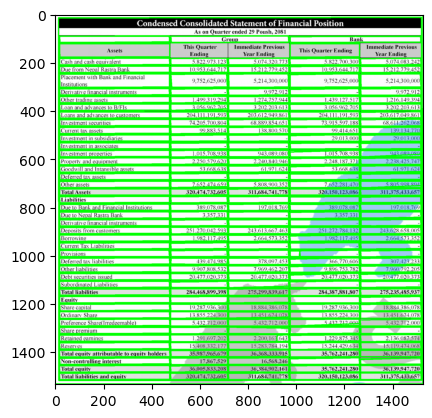

In [10]:
# image_address = '/Users/sunilthapa/Desktop/projects/nepse/1737352785-adbl.jpg'
image_address = 'image.png'
image = cv.imread(image_address)

squares = find_squares(image, 0.1)
cv.drawContours(image, squares, -1, (0,255,0),3)
cv.imshow('squares', image)

print(len(squares))
# show the image
plt.imshow(image)
plt.show()

[0, 478, 714, 921, 969, 1262, 1517]
[0, 91, 183, 247, 308, 373, 436, 500, 564, 628, 692, 756, 819, 883, 947, 1010, 1075, 1139, 1202, 1266, 1325, 1393, 1456]


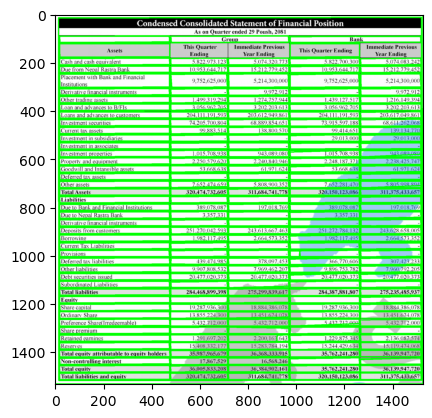

In [11]:
threshold_x, threshold_y = 30, 50
# find the top x coords of all the columns; where do they begin
top_x = []
for i in squares:
    top_x.append(i[0][0])
# print(sorted(top_x))
top_x = np.unique(top_x)

x_bins = [top_x[0]]
for i in top_x:
    # get the optimal bin value
    # distance b/w x_cords of two cols should be at least 50 units
    if i - x_bins[-1] > threshold_x:
        x_bins.append(i)

# find the top y coords of all the columns; where do they begin

top_y = []
for i in squares:
    top_y.append(i[0][1])
# print(sorted(top_y))
top_y = np.unique(top_y)

y_bins = [top_y[0]]
for i in top_y:
    # get the optimal bin value
    # distance b/w x_cords of two cols should be at least 50 units
    if i - y_bins[-1] > threshold_y:
        y_bins.append(i)

print(x_bins)
print(y_bins)
plt.imshow(image)

# make pairs of top coords
top_cords = []
for i in x_bins[1:-1]:
    for j in y_bins[1:]:
        top_cords.append((i,j))
# print(top_cords)

In [12]:
print(top_y)

[   0   15   16   91   92   93   94  122  123  183  184  185  215  216
  217  218  247  248  249  250  251  308  309  310  311  312  340  341
  342  373  374  405  406  407  436  437  438  468  469  470  500  501
  502  503  504  532  533  534  535  536  564  565  566  572  596  597
  598  599  628  629  630  633  660  661  662  663  664  692  693  694
  724  725  726  756  757  758  759  787  788  789  819  820  821  822
  851  852  853  854  883  884  885  915  916  917  920  947  948  949
  950  979  980  981  982 1010 1011 1012 1013 1016 1043 1044 1045 1047
 1075 1076 1077 1079 1082 1107 1108 1109 1110 1111 1139 1140 1171 1172
 1174 1202 1203 1204 1234 1235 1266 1268 1298 1299 1302 1325 1330 1331
 1332 1361 1362 1363 1364 1393 1394 1395 1425 1426 1427 1429 1432 1456
 1457 1458 1459 1488 1489]


In [13]:
threshold_x, threshold_y = 10, 10

# find the bottom x coords of all the columns; where do they end
top_x = []
for i in squares:
    top_x.append(i[2][0])
# print(sorted(top_x))
top_x = np.unique(top_x)

x_bins = [top_x[0]]
for i in top_x:
    # get the optimal bin value
    # distance b/w x_cords of two cols should be at least 50 units
    if i - x_bins[-1] > threshold_x:
        x_bins.append(i)

# find the bottom y coords of all the columns; where do they end

top_y = []
for i in squares:
    top_y.append(i[2][1])
# print(sorted(top_y))
top_y = np.unique(top_y)

y_bins = [top_y[0]]
for i in top_y:
    # get the optimal bin value
    # distance b/w x_cords of two cols should be at least 50 units
    if i - y_bins[-1] > threshold_y:
        y_bins.append(i)

# print(x_bins)
# print(y_bins)

# make pairs of bottom coords
bottom_cords = []
for i in x_bins[1:]:
    if i != 0:
        for j in y_bins[:-1]:
            if j != 0:
                bottom_cords.append((i,j))
# print(len(bottom_cords))

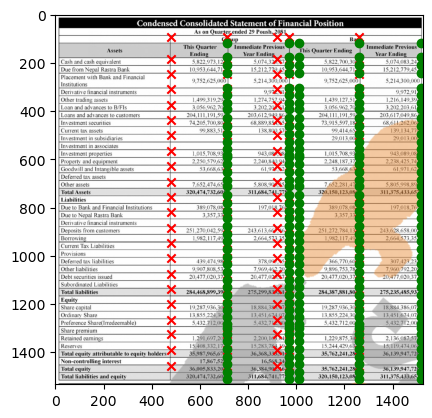

In [14]:
im = plt.imread(image_address)
implot = plt.imshow(im)

for i in top_cords:
    plt.scatter([i[0]], [i[1]], marker='x', c='r')
for i in bottom_cords:
    plt.scatter([i[0]], [i[1]], marker='o', c='g')
plt.show()

In [20]:
from PIL import Image
  
# Opens a image in RGB mode
im = Image.open(image_address)

# Size of the image in pixels (size of orginal image)
# (This is not mandatory)
width, height = im.size

def crop_image(squares, padding=[0,0,0,0]):
    # top, right, bottom, left
    
    # Setting the points for cropped image
    left, top = squares[0][0]-padding[3], squares[0][1]-padding[0]
    right, bottom = squares[1][0]+padding[1], squares[1][1]+padding[2]+2
    
    # Cropped image of above dimension
    # (It will not change orginal image)
    print(left, top, right, bottom)
    im1 = im.crop((left, top, right, bottom))

    filename = './temp/' + str(i) + '.png'
    im1.save(filename)
    
    return filename
    
    # Shows the image in image viewer
    # im1.show()

In [ ]:
# create crops
all_cords = list(zip(top_cords, bottom_cords))
for i in range(len(all_cords)):
    crop_image(all_cords[i], padding=[2,2,2,2])

476 89 715 119
476 181 715 181


SystemError: tile cannot extend outside image

: 